In [1]:
#Import top50.csv file
import pandas as pd
top50_df = pd.read_csv("top50.csv", encoding='latin-1')
top50_df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Intercept: 
 87.5
Coefficients: 
 [ 0.29222152  0.21016825  0.15508225  0.26510145  0.621315   -1.56682803
 -0.62539155 -0.17319446  1.0301014 ]
                                 OLS Regression Results                                
Dep. Variable:             Popularity   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.219
Method:                 Least Squares   F-statistic:                           0.002323
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        1.00
Time:                        07:49:17   Log-Likelihood:                         -294.58
No. Observations:                  50   AIC:                                      607.2
Df Residuals:                      41   BIC:                                      624.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                          

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


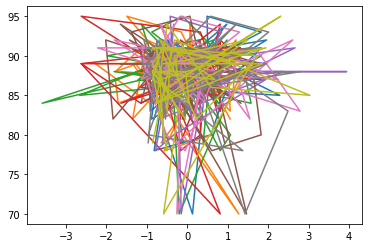

In [8]:
X = top50_df[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..',
                'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.'
                  ]]
Y = top50_df['Popularity']

X_scaled = StandardScaler().fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(X_scaled,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X_scaled).fit()
predictions = model.predict(X_scaled) 
 
print_model = model.summary()
print(print_model)

plt.plot(X_scaled, Y)
plt.show()

In [5]:
X_scaled

array([[-0.10003973, -0.64306057,  0.3911946 , -0.16701216, -0.6050936 ,
         0.92259536, -0.25702919, -0.96571922, -0.85796387],
       [-0.4923524 ,  1.20236711,  0.64521708,  0.81541229, -0.6050936 ,
         0.28944168,  2.6074527 , -0.75300573, -0.31494876],
       [ 2.28652901,  1.13138912, -2.65707504,  0.81541229,  0.12174556,
         0.69646905, -0.3860599 , -0.54029225,  3.03364442],
       [-0.88466507,  0.06671931, -0.62489528, -1.14943661, -0.6050936 ,
         0.01809011, -0.07638618, -0.54029225,  0.59007642],
       [ 0.97882011,  0.06671931, -1.13294022,  0.81541229, -0.33252891,
        -1.65524462, -0.66992748,  1.21459399, -0.4959538 ],
       [-0.59043057,  0.27965327,  0.72989123,  0.32420007, -0.5142387 ,
         1.32962272,  0.49134897, -0.69982736, -0.76746136],
       [ 1.95960178, -0.00425868,  0.30652045, -0.16701216, -0.69594849,
        -1.4291183 , -1.80539777, -1.07207596,  1.4951016 ],
       [-0.29619607,  0.27965327, -1.97968179,  0.32420007, -0

Intercept: 
 87.5
Coefficients: 
 [ 0.99118873 -0.45944327 -0.11714295 -0.06697442  0.6519612 ]
                                 OLS Regression Results                                
Dep. Variable:             Popularity   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.111
Method:                 Least Squares   F-statistic:                           0.001579
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        1.00
Time:                        07:39:25   Log-Likelihood:                         -294.59
No. Observations:                  50   AIC:                                      599.2
Df Residuals:                      45   BIC:                                      608.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef   

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


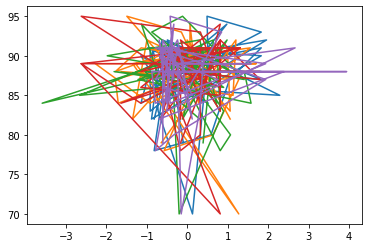

In [6]:
X = top50_df[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..',
                'Liveness',
                  ]]
Y = top50_df['Popularity']

X_scaled = StandardScaler().fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(X_scaled,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X_scaled).fit()
predictions = model.predict(X_scaled) 
 
print_model = model.summary()
print(print_model)

plt.plot(X_scaled,Y)
plt.show()